# <center>DEWANK MAHAJAN (TASK - 4)</center>
## <center> TASK-4: To Explore Decision Tree Algorithm on the Iris Dataset </center>


In [1]:
# In this task, Decision Tree based Classification Model is used to classify
# the species of flowers based on their petal and sepal dimensions.

# Importing Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets as datasets
from sklearn import tree

# <center> Importing Dataset </center>

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Description and Info about Data columns and rows
* The shape and the total null values are given by Info
* The stats of data and all Column names are given by Describe.

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
print("The Unique classes present in the Species column are :",data["Species"].unique())
print(data["Species"].value_counts())

The Unique classes present in the Species column are : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


## <center> INSIGHSTS FROM DATASET: </center>

* In the given dataset six columns (i.e) Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species are present. 
* The datatype of Id is int64, SepalLengthCm is float64, SepalWidthCm is float64, PetalLengthCm is float64, PetalWidthCm is float64 and Species is object. The total number of rows is 150 and columns is 6.
* The SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm columns are the feature variable and Species column is the target variable. For a given set of values of SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, the target Species class is predicted.
* Here SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are the input given and Species is the output which is to be predicted using the classification models. ID and Species columns can be dropped.

### Correlations and Heatmap Visualization:

Text(0.5, 1.0, 'Where is the Relation?')

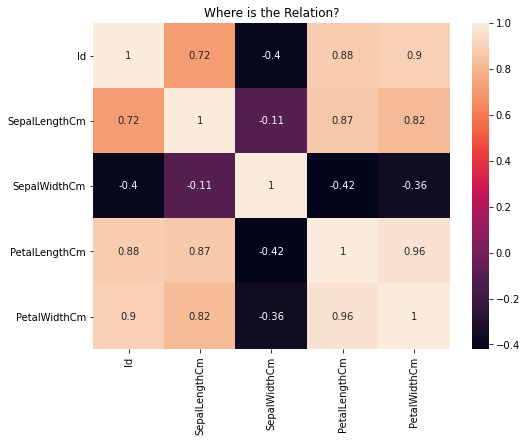

In [7]:
aa = data.corr()
#aa
# Plotting correlation heat map using visualization libraries
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(data.corr(),annot=True)
heatmap.set_title('Where is the Relation?')

## Train_Test_Split & Features

In [8]:
x = data.drop(["Id", "Species"], axis = 1)
y = data["Species"]

In [9]:
# Importing train-test split package
from sklearn.model_selection import train_test_split

# Creating train-test split with 80:20 train-test ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [10]:
#                                  DECISION TREE CLASSIFICATION MODEL:

# Importing decision tree classification model from scikit learn packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Importing metrics
from sklearn import metrics

# Instantsiating the decision tree classification model
DTC = DecisionTreeClassifier(criterion='gini')

In [11]:
# Fitting the decision tree classification model with train datasets
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:

#predicting the test datas with decision tree classification model
y_pred = DTC.predict(x_test)

In [13]:
# Importing Model's performance evaluating metrics:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The training set accuracy of model is",DTC.score(x_train,y_train))

print("The testing set accuracy of model is",DTC.score(x_test,y_test))

The training set accuracy of model is 1.0
The testing set accuracy of model is 1.0


In [14]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [15]:
#Printing the classification report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



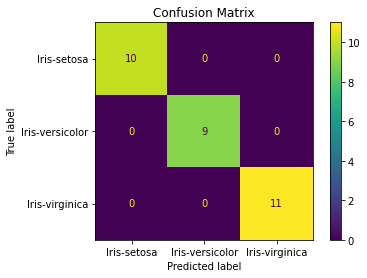

In [16]:

#Plotting the confusion matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(DTC,x_test,y_test)
plt.title("Confusion Matrix")
plt.show()

In [17]:
# PREDICTION COMPARISONS:

# Comparing Actual Values vs Predicted Values
df = pd.DataFrame({'Actual Classes': y_test, 'Predicted Classes': y_pred})  
df

,Actual Classes,Predicted Classes
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


## VISUALIZING THE DECISION TREE CLASSIFICATION MODEL:

In [20]:
#Printing the unique elements of target variable
species_array = data.Species.unique()
print(species_array)
print(type(species_array))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
<class 'numpy.ndarray'>


In [21]:
#Converting numpy array into list
species_list = species_array.tolist()
print(species_list)
print(type(species_list))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
<class 'list'>


In [27]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels = ['setosa','versicolor','virginica']

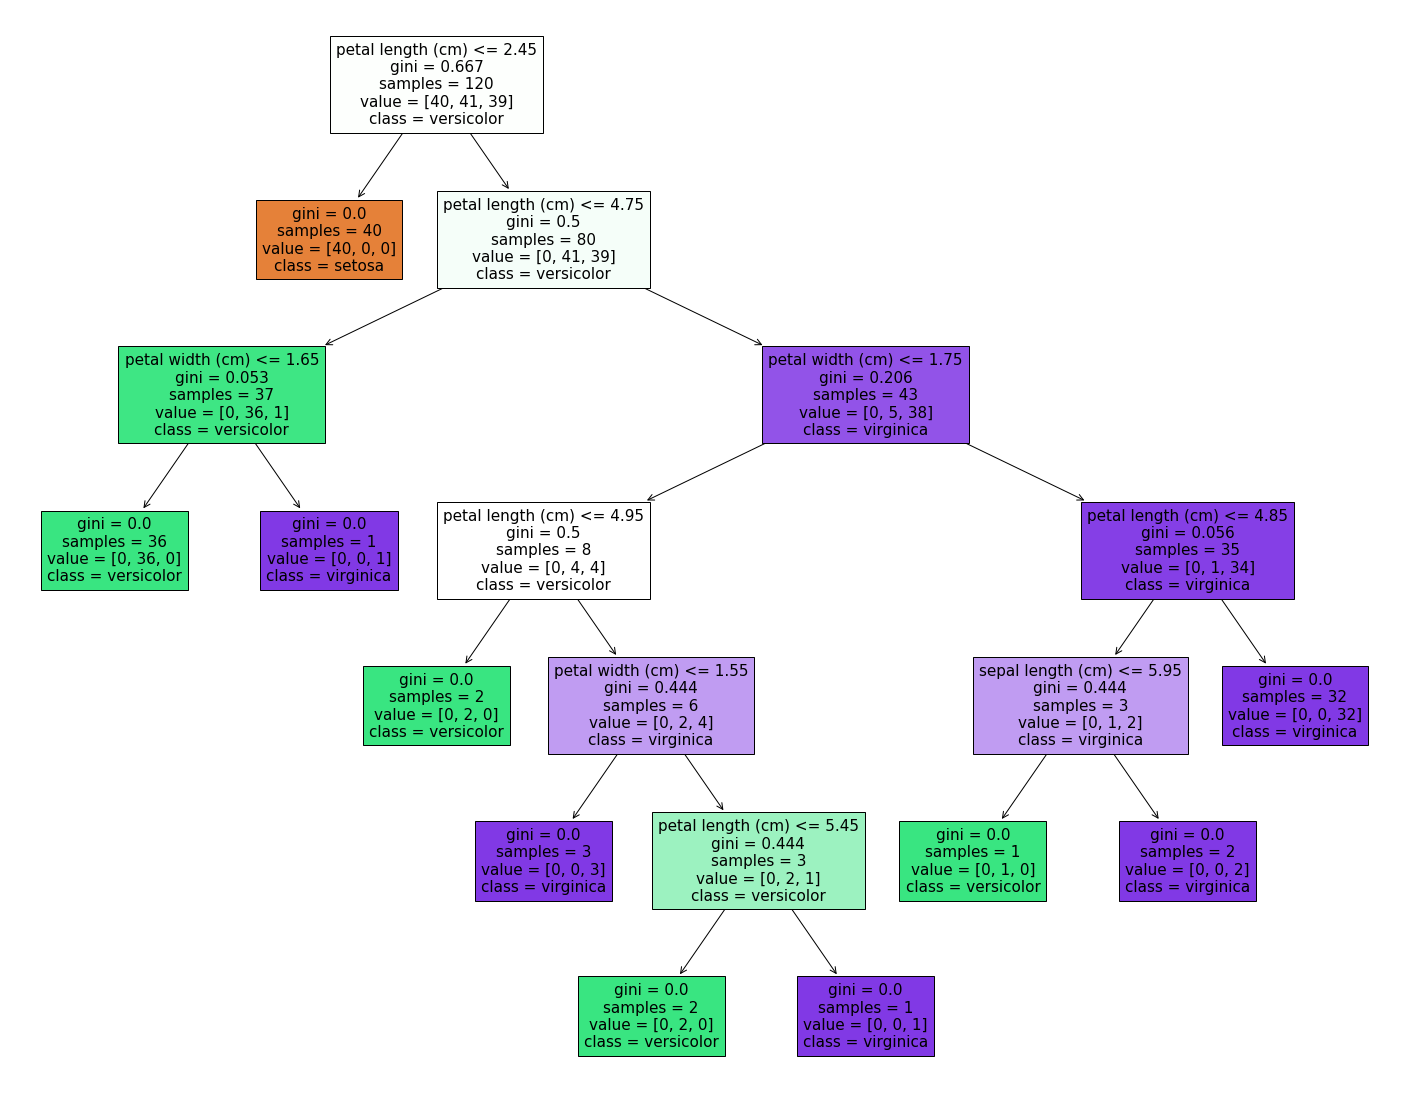

In [28]:
#vizualising the decision tree
fig = plt.figure(figsize=(25,20))
Viztree = tree.plot_tree(DTC, feature_names=features, class_names=labels, filled=True)

# <center> THANK YOU </center>